In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set()
df = pd.read_csv('Iris.csv')

In [2]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop('Id',axis=1)
df.columns = map(str.lower, df.columns)

## Exploratory Data Analysis:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepallengthcm  150 non-null    float64
 1   sepalwidthcm   150 non-null    float64
 2   petallengthcm  150 non-null    float64
 3   petalwidthcm   150 non-null    float64
 4   species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**As we can see here there are no outliers but we will visualize the feature variables**

In [6]:
df.isnull().sum()

sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64

**Here, we can observe there are no missing values**

In [7]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Now checking whether the target variable is having imbalanced data

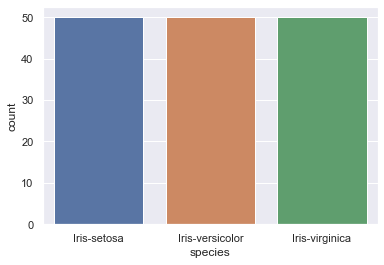

In [8]:
sns.countplot(df['species'])

**We can observe that the data has balanced data in target variable**

### Univariate Analysis:

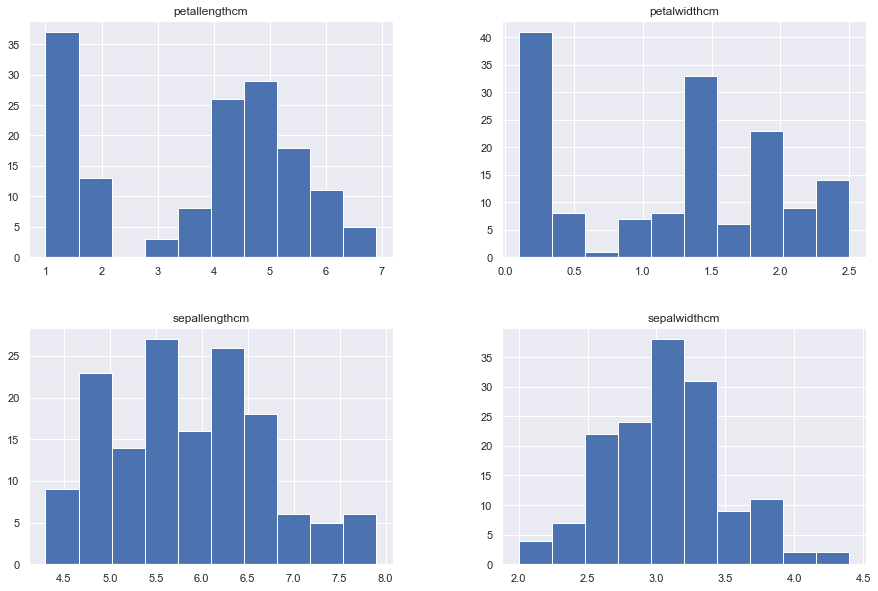

In [9]:
df.hist(figsize=(15,10))
plt.show()

### Bi-variate Analysis:

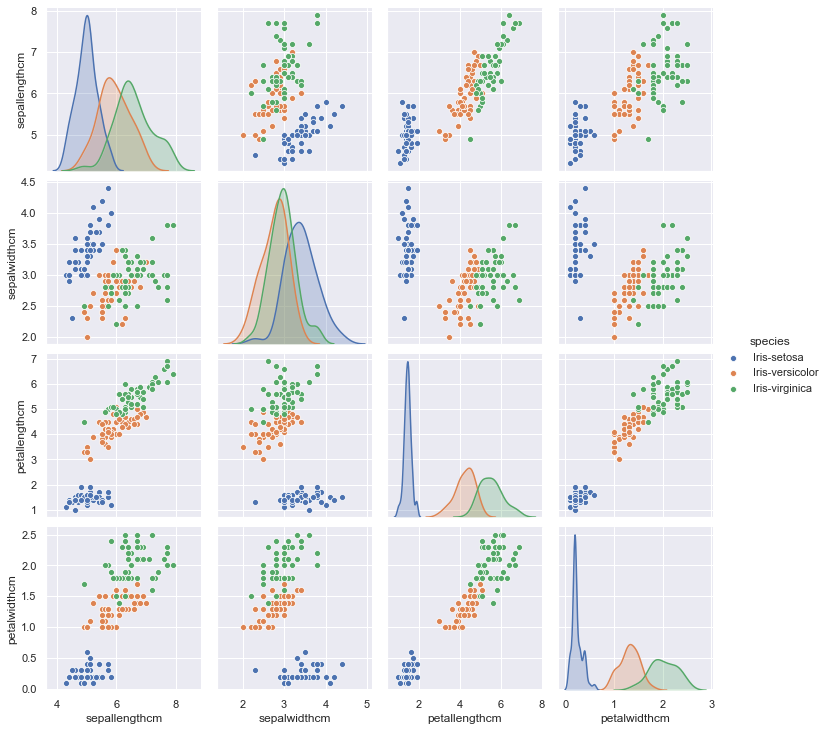

In [10]:
sns.pairplot(df, hue = 'species')

**Now let's see how the independent effects the target variable**

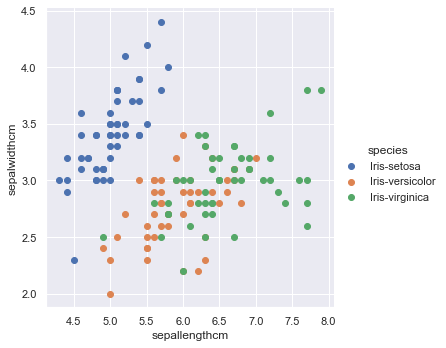

In [11]:
sns.FacetGrid(df, hue='species', height = 5).map(plt.scatter, 'sepallengthcm', 'sepalwidthcm').add_legend()

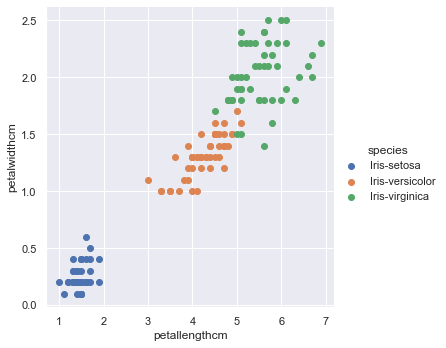

In [12]:
sns.FacetGrid(df, hue='species', height = 5).map(plt.scatter, 'petallengthcm', 'petalwidthcm').add_legend()

**This two features can also be used to create a model but the target variable classes data is imbalanced here**

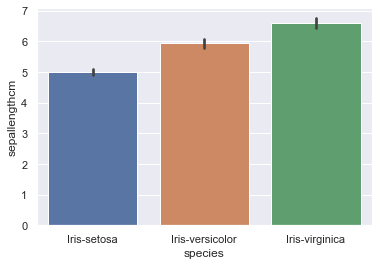

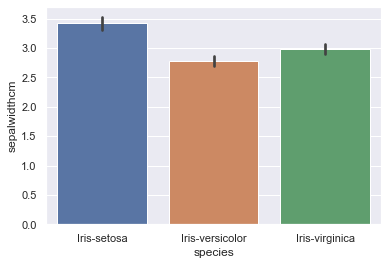

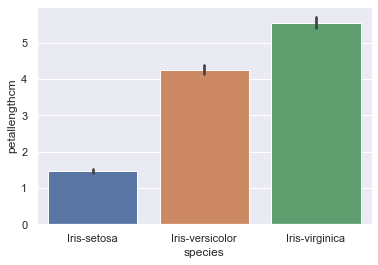

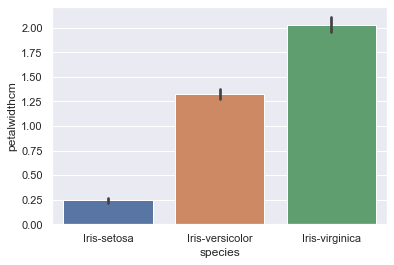

In [13]:
for col in df.iloc[:,:-1].columns:
    sns.barplot(df['species'], df[col])
    plt.show()

### Data Preparation:
         1) Encoding the target variable
         2) splitting the data into training and testing data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
mapping = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2}
df['species'] = df['species'].map(mapping)
df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
X = df.iloc[:,:-1]
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 23, stratify = Y)

## Multi-class Classification

### Modelling

In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

sgdc = Pipeline([('scaler', StandardScaler()),
                ('sgd', SGDClassifier())])

sgdc.fit(x_train, y_train)
ypred = sgdc.predict(x_test)
print('accuracy score:', accuracy_score(y_test, ypred))
print(classification_report(y_test, ypred))

accuracy score: 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



In [19]:
dr = DecisionTreeClassifier()
dr.fit(x_train, y_train)
ypred1 = dr.predict(x_test)
print('accuracy score:', accuracy_score(y_test, ypred1))
print(classification_report(y_test, ypred1))

accuracy score: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [20]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
ypred2 = rf.predict(x_test)
print('accuracy score:', accuracy_score(y_test, ypred2))
print(classification_report(y_test, ypred2))

accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
ypred3 = xgb.predict(x_test)
print('accuracy score:', accuracy_score(y_test, ypred3))
print(classification_report(y_test, ypred3))

C:\Users\vskis\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



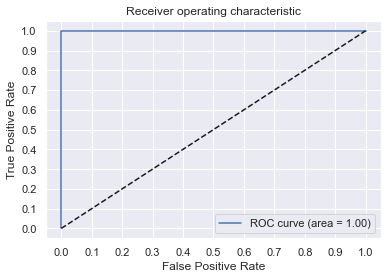

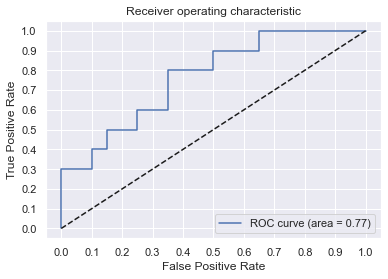

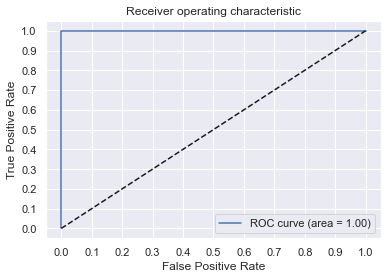

In [22]:
import numpy as np
y_score = sgdc.decision_function(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test_dummies = pd.get_dummies(y_test, drop_first = False).values
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i in range(3): 
    plt.figure() 
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i]) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xticks(np.arange(0.0,1.1, step = 0.1)) 
    plt.yticks(np.arange(0.0,1.1, step = 0.1))
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.title('Receiver operating characteristic') 
    plt.legend(loc="lower right") 
    plt.show()

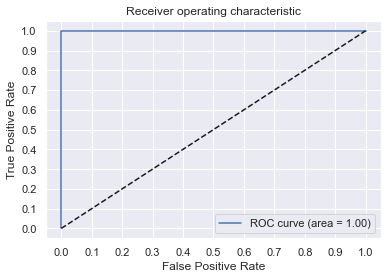

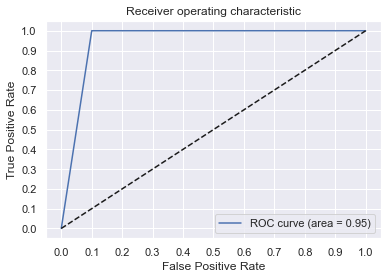

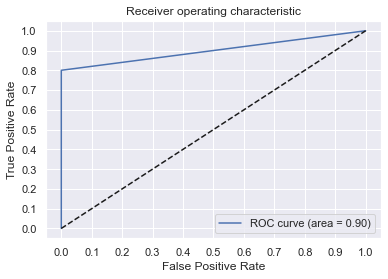

In [23]:
y_score1 = dr.predict_proba(x_test)
fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()
y_test_dummies = pd.get_dummies(y_test, drop_first = False).values
for i in range(3):
    fpr1[i], tpr1[i], _ = roc_curve(y_test_dummies[:,i], y_score1[:,i])
    roc_auc1[i] = auc(fpr1[i], tpr1[i])
for i in range(3): 
    plt.figure() 
    plt.plot(fpr1[i], tpr1[i], label='ROC curve (area = %0.2f)' % roc_auc1[i]) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xticks(np.arange(0.0,1.1, step = 0.1)) 
    plt.yticks(np.arange(0.0,1.1, step = 0.1))
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.title('Receiver operating characteristic') 
    plt.legend(loc="lower right") 
    plt.show()

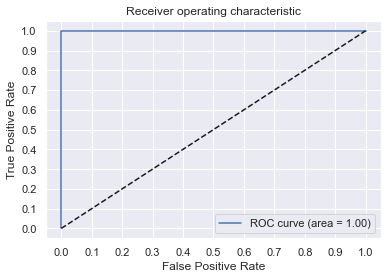

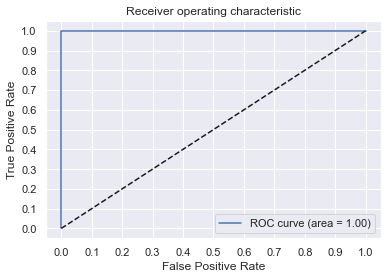

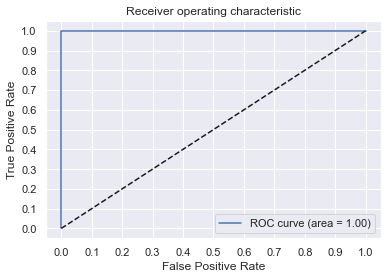

In [24]:
y_score2 = rf.predict_proba(x_test)
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
y_test_dummies = pd.get_dummies(y_test, drop_first = False).values
for i in range(3):
    fpr2[i], tpr2[i], _ = roc_curve(y_test_dummies[:,i], y_score2[:,i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])
for i in range(3): 
    plt.figure() 
    plt.plot(fpr2[i], tpr2[i], label='ROC curve (area = %0.2f)' % roc_auc2[i]) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xticks(np.arange(0.0,1.1, step = 0.1)) 
    plt.yticks(np.arange(0.0,1.1, step = 0.1))
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.title('Receiver operating characteristic') 
    plt.legend(loc="lower right") 
    plt.show()

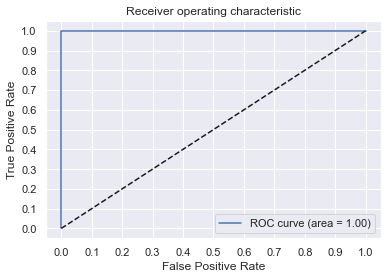

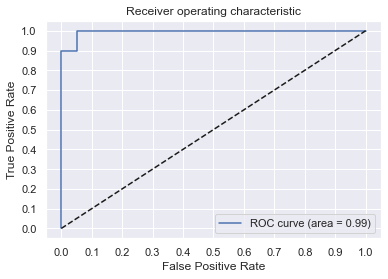

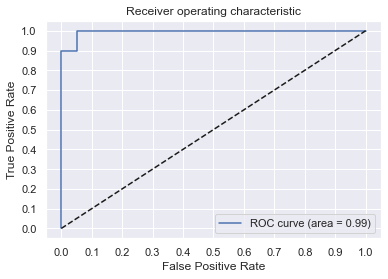

In [25]:
y_score3 = xgb.predict_proba(x_test)
fpr3 = dict()
tpr3 = dict()
roc_auc3 = dict()
y_test_dummies = pd.get_dummies(y_test, drop_first = False).values
for i in range(3):
    fpr3[i], tpr3[i], _ = roc_curve(y_test_dummies[:,i], y_score3[:,i])
    roc_auc3[i] = auc(fpr3[i], tpr3[i])
for i in range(3): 
    plt.figure() 
    plt.plot(fpr3[i], tpr3[i], label='ROC curve (area = %0.2f)' % roc_auc3[i]) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xticks(np.arange(0.0,1.1, step = 0.1)) 
    plt.yticks(np.arange(0.0,1.1, step = 0.1))
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.title('Receiver operating characteristic') 
    plt.legend(loc="lower right") 
    plt.show()

In [26]:
import joblib

In [27]:
joblib.dump(rf, 'model.pkl')

['model.pkl']

In [28]:
model = joblib.load('model.pkl')

In [ ]:
inputs = []